In [1]:
import numpy as np              # Массивы
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline  
import pandas as pd             # Таблицы и временные ряды
import seaborn as sns           # Графика
import sklearn                  # Алгоритмы машинного обучения

# Отток клиентов


### 1. Загрузка данных о клиентах банка.

Нас интересует покинул ли клиент банк (закрыл свой счет) или он продолжает оставаться клиентом.

In [2]:
url = "https://raw.githubusercontent.com/elenamishina/MachineLearningUNN/main/Churn_Modelling.csv"
rawData = pd.read_csv(url)

In [3]:
rawData

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Тип объекта rawData

In [4]:
type(rawData)


pandas.core.frame.DataFrame

Размеры таблицы

In [5]:
rawData.shape

(10000, 14)

Таблица содержит данные о 10000 клиентах, из разных стран.

Первые 8 строк

In [6]:
rawData.head(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


Последние 8 строк

In [7]:
rawData.tail(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Столбцы (признаки):

- `RowNumber` - номера строк от 1 до 10000
- `CustomerId` - уникальный идентификатор клиента банка
- `Surname` - фамилия клиента
- `CreditScore` - кредитный рейтинг клиента
- `Geograhy` - страна в которой находится клинт
- `Gender` - пол клиента
- `Age` - возраст клиента
- `Tenure` - количество лет, в течении которых клиент состоит в банке
- `Balance` - баланс клиента
- `NumOfProducts` - число продуктов банка которыми пользуется клиент
- `HasCrCard` - бинарный флаг, указывающий, есть ли у клиента кредитная карта в банке или нет
- `isActiveMember` - бинарный флаг, указывающий, является ли клиент активным участником банка или нет
- `EstimatedSalary` - ориентировочная заработная плата клиента в долларах
- `Exited` - бинарный флаг 1, если клиент закрыл счет в банке, и 0, если клиент остался

Признак `Exited` (целевой признак), `isActiveMember`, `HasCrCard` - бинарные,`Geograhy`, `Surname`, `Gender` - номинальные(категориальные), остальные признаки - количественные(числовые).

Целевая переменная - это двоичная переменная, отражающая тот факт, покинул ли клиент банк (закрыл свой счет) или он / она продолжает оставаться клиентом. Задача классификации.

In [8]:
rawData.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Имена строк(совпадают с номерами):

In [9]:
rawData.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Заменим тип 'Object' для столбцов `Gender` и `Geography` на специальный, предназначенный для хранения категориальных значений.

In [11]:
rawData['Gender'] = rawData['Gender'].astype('category')

In [12]:
rawData['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [13]:
rawData['Geography'] = rawData['Geography'].astype('category')
rawData['Geography'].dtype

CategoricalDtype(categories=['France', 'Germany', 'Spain'], ordered=False)

Получим значение отдельного элемента

In [14]:
rawData.at[2, 'Gender']

'Female'

In [15]:
rawData.iat[2, 5]

'Female'

Работа с подтаблицами

In [16]:
rawData.loc[:10,['CustomerId', 'Surname', 'Gender', 'Age', 'EstimatedSalary', 'Tenure']]

,CustomerId,Surname,Gender,Age,EstimatedSalary,Tenure
0,15634602,Hargrave,Female,42,101348.88,2
1,15647311,Hill,Female,41,112542.58,1
2,15619304,Onio,Female,42,113931.57,8
3,15701354,Boni,Female,39,93826.63,1
4,15737888,Mitchell,Female,43,79084.10,2
5,15574012,Chu,Male,44,149756.71,8
6,15592531,Bartlett,Male,50,10062.80,7
7,15656148,Obinna,Female,29,119346.88,4
8,15792365,He,Male,44,74940.50,4
9,15592389,H?,Male,27,71725.73,2


In [17]:
rawData.loc[:, ['CustomerId','CreditScore','Balance','NumOfProducts','HasCrCard','NumOfProducts','IsActiveMember']]

,CustomerId,CreditScore,Balance,NumOfProducts,HasCrCard,NumOfProducts,IsActiveMember
0,15634602,619,0.00,1,1,1,1
1,15647311,608,83807.86,1,0,1,1
2,15619304,502,159660.80,3,1,3,0
3,15701354,699,0.00,2,0,2,0
4,15737888,850,125510.82,1,1,1,1
...,...,...,...,...,...,...,...
9995,15606229,771,0.00,2,1,2,0
9996,15569892,516,57369.61,1,1,1,1
9997,15584532,709,0.00,1,0,1,1
9998,15682355,772,75075.31,2,1,2,0


Доступ по булевой маске

In [18]:
df = rawData.iloc[:9, 0:4]
df

,RowNumber,CustomerId,Surname,CreditScore
0,1,15634602,Hargrave,619
1,2,15647311,Hill,608
2,3,15619304,Onio,502
3,4,15701354,Boni,699
4,5,15737888,Mitchell,850
5,6,15574012,Chu,645
6,7,15592531,Bartlett,822
7,8,15656148,Obinna,376
8,9,15792365,He,501


In [19]:
df.loc[:9, [False, True, False, True]]

,CustomerId,CreditScore
0,15634602,619
1,15647311,608
2,15619304,502
3,15701354,699
4,15737888,850
5,15574012,645
6,15592531,822
7,15656148,376
8,15792365,501


### 2. Этапы предобработки данных. Боремся с выбросами(outliers)

Построим диаграмму рассеивания для признаков `Balance` и `EstimatedSalary`

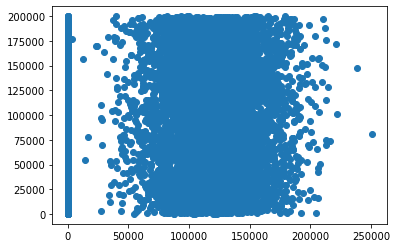

In [20]:
plt.scatter(rawData['Balance'], rawData['EstimatedSalary'])
pass

Для обнаружения выбрасов найдем квантили для признака `Balance`

In [21]:
rawData['Balance'].quantile([0.004, .01, .05, .1, .5, .999,])

0.004         0.00000
0.010         0.00000
0.050         0.00000
0.100         0.00000
0.500     97198.54000
0.999    212314.40894
Name: Balance, dtype: float64

Мы видим, что 99,9% всех значений признака `Balance` находятся в диапазоне от 0 до 212314.40894

Удалим строки в таблице, в которых `Balance` выходят за пределы квантилей 0.004 и 0.999

In [22]:
rows_to_drop=rawData[rawData['Balance'] > rawData['Balance'].quantile(0.999)].index
data = rawData.drop(rows_to_drop)
data.shape

(9990, 14)

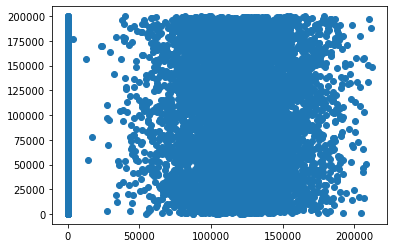

In [23]:
plt.scatter(data['Balance'], data['EstimatedSalary'])
pass

### 3. Визуализация и описательная статистика

Получим сводную информацию о признаках

In [24]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,5002.123423,1.569096e+07,650.534434,38.918118,5.013914,76340.744371,1.530430,0.705806,0.515215,100076.197582,0.203403
std,2886.817600,7.192520e+04,96.655878,10.488399,2.892803,62258.424797,0.581547,0.455702,0.499793,57524.548186,0.402550
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2502.250000,1.562859e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50926.707500,0.000000
50%,5003.500000,1.569074e+07,652.000000,37.000000,5.000000,97079.410000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.750000,127568.190000,2.000000,1.000000,1.000000,149395.882500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,212314.030000,4.000000,1.000000,1.000000,199992.480000,1.000000


Таблица содержит средние значения, стандартное отклонение, минимальное и максимальное значение, мидиана и значение квартилей для количественных признаков.

Получим информацию о категориальных признаках

In [25]:
data.describe(include=['category'])

,Geography,Gender
count,9990,9990
unique,3,2
top,France,Male
freq,5011,5451


In [26]:
data['Geography'].value_counts()

France     5011
Germany    2507
Spain      2472
Name: Geography, dtype: int64

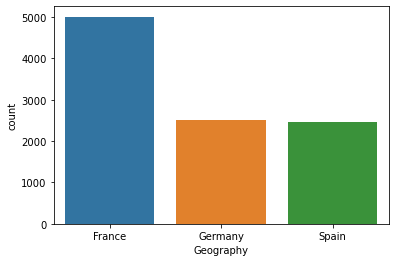

In [27]:
sns.countplot(x='Geography', data=data)

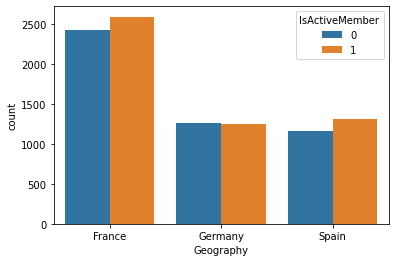

In [28]:
sns.countplot(x='Geography', hue='IsActiveMember', data=data)

Видим, что большинство клиентов из Франции и также больше половины из них являются активными клиентами банка.

Посмотрим сколько клиентов покинули банк:

0    7958
1    2032
Name: Exited, dtype: int64

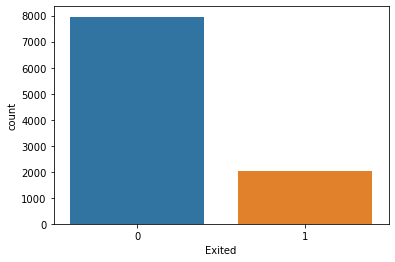

In [29]:
sns.countplot(x='Exited', data=data)
data.loc[:,'Exited'].value_counts()

Построим диаграмму рассеивания:

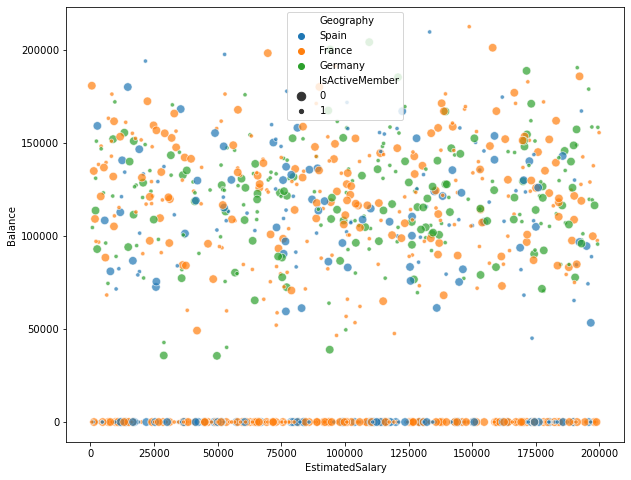

In [30]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.figure(figsize = (10,8))
sns.scatterplot(x='EstimatedSalary',y='Balance', size='IsActiveMember', hue ='Geography', data=data.iloc[random_subset] ,alpha=0.7)

Видим, что много активных клиентов банка во Франции имеют нулевой баланс.

Построим все возможные диаграммы рассеивания для каждой пары переменных

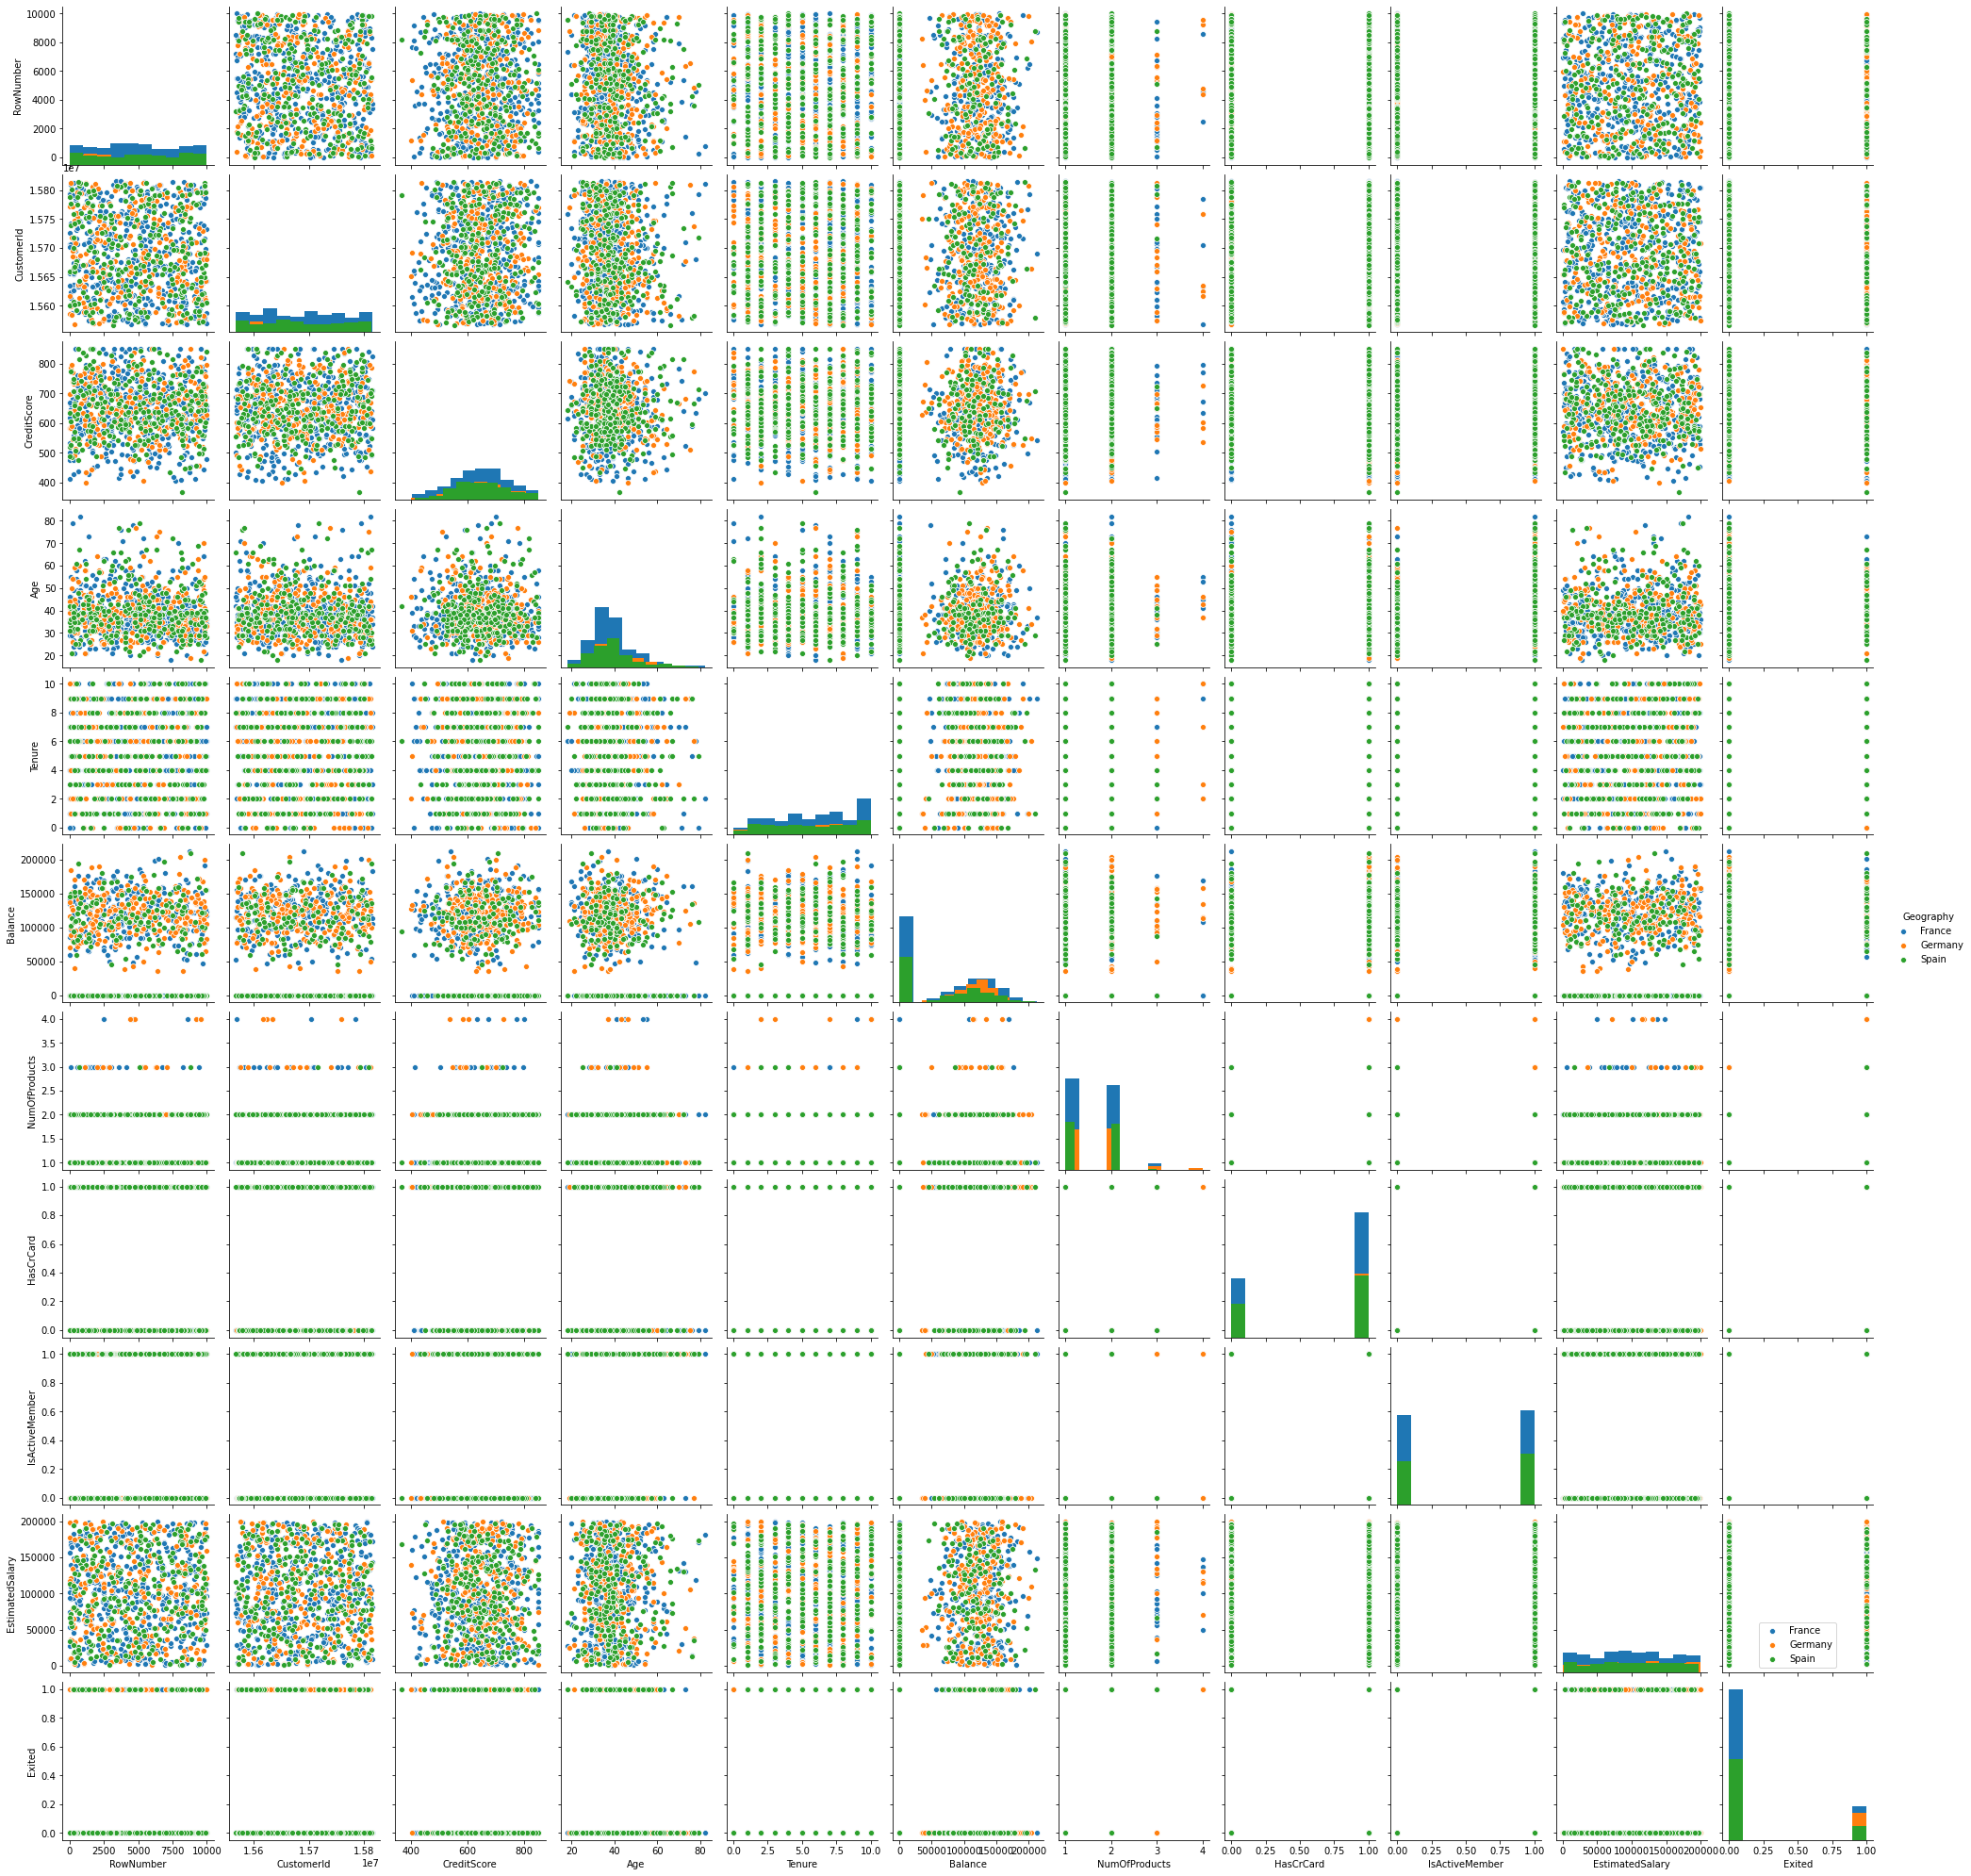

In [31]:
sns.pairplot(data.iloc[random_subset], hue='Geography', diag_kind='hist')
plt.legend()

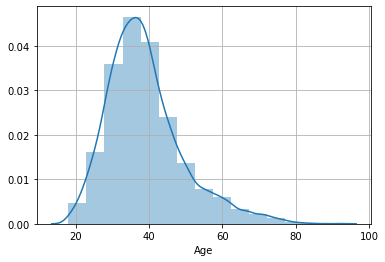

In [32]:
sns.distplot(data['Age'], bins=15)
plt.grid()
pass

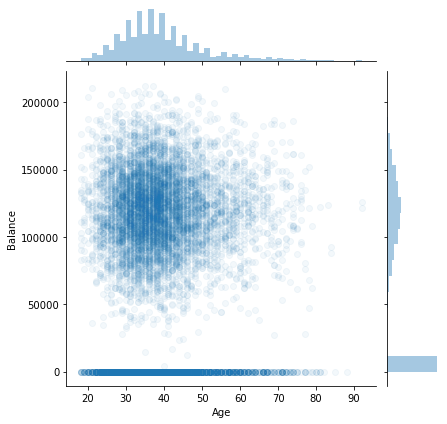

In [33]:
sns.jointplot(x='Age', y='Balance', alpha=.05, data = data)

Видим, что большенству клиентам банка от 30 до 40 лет и баланс 100000-150000$

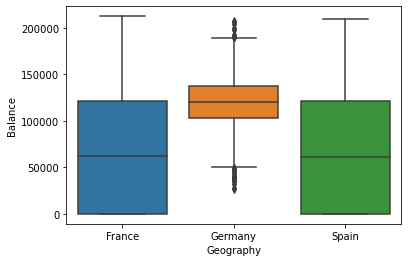

In [34]:
sns.boxplot(x="Geography", y="Balance" , data=data)
pass

Видим, что половина клиентов банка в Германии имеют баланс в банке от 100000 до 14000$ и Германии нет клиентов с нулевым балансом. 

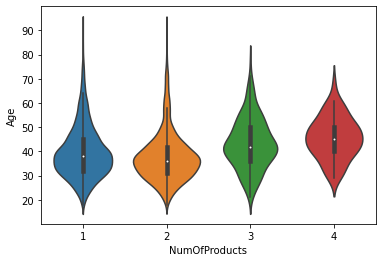

In [35]:
sns.violinplot(x="NumOfProducts",y="Age", data=data)

Вычислим матрицу корреляции для количественных признаков

In [36]:
corr_mat = data.corr()
corr_mat

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004077,0.005664,0.000692,-0.007185,-0.007789,0.007323,0.000587,0.011919,-0.005845,-0.016534
CustomerId,0.004077,1.000000,0.004781,0.009768,-0.015102,-0.011892,0.016643,-0.013321,0.001197,0.015353,-0.006100
CreditScore,0.005664,0.004781,1.000000,-0.003791,0.000579,0.006450,0.012184,-0.004999,0.025308,-0.000947,-0.027116
Age,0.000692,0.009768,-0.003791,1.000000,-0.009868,0.027550,-0.030152,-0.011219,0.085260,-0.007181,0.284777
Tenure,-0.007185,-0.015102,0.000579,-0.009868,1.000000,-0.011386,0.013405,0.022622,-0.028362,0.007907,-0.013950
Balance,-0.007789,-0.011892,0.006450,0.027550,-0.011386,1.000000,-0.304439,-0.013261,-0.009683,0.012271,0.117130
NumOfProducts,0.007323,0.016643,0.012184,-0.030152,0.013405,-0.304439,1.000000,0.002998,0.009256,0.014468,-0.047824
HasCrCard,0.000587,-0.013321,-0.004999,-0.011219,0.022622,-0.013261,0.002998,1.000000,-0.011333,-0.009912,-0.006111
IsActiveMember,0.011919,0.001197,0.025308,0.085260,-0.028362,-0.009683,0.009256,-0.011333,1.000000,-0.011082,-0.156698
EstimatedSalary,-0.005845,0.015353,-0.000947,-0.007181,0.007907,0.012271,0.014468,-0.009912,-0.011082,1.000000,0.012327


Видно, что большинтсво коэффициентов корреляция между признакамми почти равны нулю. Есть небольшая зависимость между `Age` и `Exited`, `Balance` и `Exited` , совсем незначительная между `Age` и `Balance`.

### 4. Заполнение пропущенных значений

Проверим наличие пропущенных значений

In [37]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Пропущенных значений нет.

### 5. Бинаризация номинальных признаков

Заменим бинарный признак `Gender` на числовой ( Male -> 1, Female -> 0)

In [38]:
data['Gender'] = pd.factorize(data['Gender'])[0]

К небинарному признаку `Geography` применим метод бинаризации. Этот признак принимает 3 значения 'France', 'Germany', 'Spain'. Вместо признака `Geography` будем использовать 3 новых признака 'France', 'Germany', 'Spain'.

In [39]:
geography_dummies = pd.get_dummies(data['Geography'])

In [40]:
geography_dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


Добавим эти столбцы к таблице и удалим столбец `Geography`

In [41]:
data = pd.concat((data, geography_dummies), axis=1)
data = data.drop(['Geography'], axis=1)

In [42]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### 6. Нормализация количественных признаков

In [43]:
data.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
count,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,5002.123423,1.569096e+07,650.534434,0.545646,38.918118,5.013914,76340.744371,1.530430,0.705806,0.515215,100076.197582,0.203403,0.501602,0.250951,0.247447
std,2886.817600,7.192520e+04,96.655878,0.497937,10.488399,2.892803,62258.424797,0.581547,0.455702,0.499793,57524.548186,0.402550,0.500022,0.433582,0.431551
min,1.000000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,2502.250000,1.562859e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50926.707500,0.000000,0.000000,0.000000,0.000000
50%,5003.500000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97079.410000,1.000000,1.000000,1.000000,100185.240000,0.000000,1.000000,0.000000,0.000000
75%,7501.750000,1.575323e+07,718.000000,1.000000,44.000000,7.750000,127568.190000,2.000000,1.000000,1.000000,149395.882500,0.000000,1.000000,1.000000,0.000000
max,10000.000000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,212314.030000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


Необходимо нормализовать количественные признаки перед применением алгоритмов машинного обучения. Выполним стандартизацию всех признаков.

In [44]:
data = data.drop(['Surname'], axis=1)
data_stand = (data - data.mean(axis = 0)) / data.std(axis=0)
data_stand.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
count,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03
mean,2.328690e-16,2.742451e-15,4.794296e-16,3.356230e-16,1.896825e-16,2.803841e-16,6.125964e-15,-5.485435e-16,4.918321e-16,5.521109e-16,4.043790e-15,-6.018987e-17,6.244588e-16,2.225669e-16,-7.795121e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732400e+00,-1.741525e+00,-3.109324e+00,-1.095813e+00,-1.994405e+00,-1.733237e+00,-1.226191e+00,-9.121024e-01,-1.548830e+00,-1.030856e+00,-1.739512e+00,-5.052870e-01,-1.003158e+00,-5.787854e-01,-5.733916e-01
25%,-8.659617e-01,-8.671968e-01,-6.883641e-01,-1.095813e+00,-6.595972e-01,-6.961807e-01,-1.226191e+00,-9.121024e-01,-1.548830e+00,-1.030856e+00,-8.544090e-01,-5.052870e-01,-1.003158e+00,-5.787854e-01,-5.733916e-01
50%,4.768492e-04,-3.094270e-03,1.516272e-02,9.124735e-01,-1.828800e-01,-4.809837e-03,3.331062e-01,-9.121024e-01,6.455839e-01,9.699702e-01,1.895581e-03,-5.052870e-01,9.967520e-01,-5.787854e-01,-5.733916e-01
75%,8.658762e-01,8.656902e-01,6.979975e-01,9.124735e-01,4.845241e-01,9.458251e-01,8.228195e-01,8.074490e-01,6.455839e-01,9.699702e-01,8.573676e-01,-5.052870e-01,9.967520e-01,1.727583e+00,-5.733916e-01
max,1.731275e+00,1.734155e+00,2.063667e+00,9.124735e-01,5.061009e+00,1.723617e+00,2.184014e+00,4.246552e+00,6.455839e-01,9.699702e-01,1.736933e+00,1.978875e+00,9.967520e-01,1.727583e+00,1.743834e+00


### 7. Отбор признаков

Для определения покинул ли клиент банк (закрыл свой счет) или продолжает оставаться клиентом будем использовать все входные признаки кроме `RowNumber`, `CustomerId`, `Surname`, `Exited`

In [45]:
data_stand.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'France', 'Germany', 'Spain'],
      dtype='object')

In [46]:
data_stand.drop(['RowNumber', 'CustomerId'] , axis = 1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326255,-1.095813,0.293837,-1.041866,-1.226191,-0.912102,0.645584,0.969970,0.022124,1.978875,0.996752,-0.578785,-0.573392
1,-0.440061,-1.095813,0.198494,-1.387552,0.119937,-0.912102,-1.548830,0.969970,0.216714,-0.505287,-1.003158,-0.578785,1.743834
2,-1.536735,-1.095813,0.293837,1.032246,1.338294,2.527000,0.645584,-1.030856,0.240860,1.978875,0.996752,-0.578785,-0.573392
3,0.501424,-1.095813,0.007807,-1.387552,-1.226191,0.807449,-1.548830,-1.030856,-0.108642,-0.505287,0.996752,-0.578785,-0.573392
4,2.063667,-1.095813,0.389181,-1.041866,0.789774,-0.912102,0.645584,0.969970,-0.364924,-0.505287,-1.003158,-0.578785,1.743834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246335,0.912474,0.007807,-0.004810,-1.226191,0.807449,0.645584,-1.030856,-0.066155,-0.505287,0.996752,-0.578785,-0.573392
9996,-1.391891,0.912474,-0.373567,1.723617,-0.304716,-0.912102,0.645584,0.969970,0.028224,-0.505287,0.996752,-0.578785,-0.573392
9997,0.604884,-1.095813,-0.278223,0.686561,-1.226191,-0.912102,-1.548830,0.969970,-1.008102,1.978875,0.996752,-0.578785,-0.573392
9998,1.256681,0.912474,0.293837,-0.696181,-0.020326,0.807449,0.645584,-1.030856,-0.124950,1.978875,-1.003158,1.727583,-0.573392


In [47]:
X = data_stand.drop('Exited', axis = 1)
y = data['Exited']

### 8. Обучаем модель

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка , 25% - тестовая)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(7492, 2498)

### kNN (k ближайших соседей)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 12)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 12,
 'p': 2,
 'weights': 'uniform'}

Обучим модель на обучающей выборке X_train, y_train

In [50]:
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=12)

Получим предскзаания на данных X_test

In [51]:
y_test_predict = knn.predict(X_test)
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

Вычислим ошибки на обучающей и тестовой выборках

In [52]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1628403630539242 0.17734187349879904


Попробуем с другим количеством соседей

In [53]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16657768286171917 0.1733386709367494


In [54]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17124933262146289 0.17854283426741394


Можно попробовать подобрать параметр

In [55]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 5, 10, 12, 15, 20, 25, 30, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.17338549176680007 15


In [56]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.15790176187933797 0.1701361088871097


Видим, что наименьшая ошибка на тестовой выборке из проверенных варинатов получается при K=15 